In [1]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [2]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install iteration_utilities

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from iteration_utilities import random_combination


def gen_nextday(prev, true):
    '''
        Mix with a random normal distribution in some ratio to form new day with respect to the previous day
        - prev: python array, all the values of previous day
        - r: ratio of mixing with another
    '''
    value_range = [300, 850]
    mu_range = [value_range[0] + 50*5, value_range[1] - 50*5]
    if true:
        r=0.05
        sigma_range = [50,] # (850 - 300) / 10
    else:
        r = 0.3
        sigma_range = [25, ]
    # remove random r% of element in prev
    result = random.sample(prev, round(len(prev) * (1 - r)))
    # add r% of a new random normal distribution to result
    mu = random.uniform(mu_range[0], mu_range[1])

    max_sigma = max(min(mu-value_range[0], value_range[1]-mu)/6, sigma_range[0])
    sigma = random.uniform(sigma_range[0], max_sigma)
    s = np.random.normal(mu, sigma, len(prev)).tolist()
    s = [round(i) for i in s]
    result = result + random.sample(s, round(len(prev) * r))
    # shuffle result and return
    random.shuffle(result)
    return result


def generate_data():
    num_days = 1000
    num_sample = 10000 #10000

    bin_num = 5
    value_range = [300, 850]
    sigma_range = [25, ] # (850 = 300) / 12
    mu_range = [300 + sigma_range[0], 850-sigma_range[0]]

    data = pd.DataFrame(columns=list(range(num_sample)) + ['Labels'])

    # generate first day
    first_day = []
    for _ in range(bin_num):
        mu = random.uniform(mu_range[0], mu_range[1])
        max_sigma = max(min(mu-value_range[0], value_range[1]-mu)/6, sigma_range[0])
        sigma = random.uniform(sigma_range[0], max_sigma)
        s = np.random.normal(mu, sigma, round(num_sample / bin_num)).tolist()
        first_day.extend([round(i) for i in s])

    data.loc[0] = first_day + [1]

    # 1 is true, 0 is false

    prev = first_day
    for day in range(1, num_days):
        label = np.random.choice([1, 0], p=[0.7, 0.3])
        if (label == 1):
            next = gen_nextday(prev, True)
        else:
            next = gen_nextday(prev, False)
        prev = next
        data.loc[day] = next + [label]

    plt.figure()
    for i,row in data.loc[0:5].iterrows():
        sns.kdeplot(row.drop('Labels'), color= 'red' if row['Labels'] == 0 else 'blue', multiple='stack')
    plt.show()
    print(data.loc[0:5])

    return data

# Loading data

In [5]:
import pandas as pd

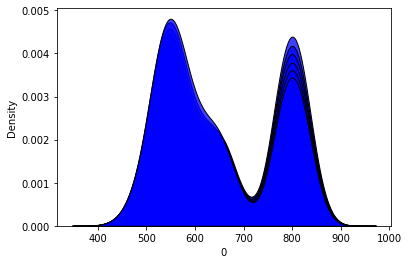

     0    1    2    3    4    5    6    7    8    9  ... 9991 9992 9993 9994  \
0  642  638  628  638  630  619  584  680  697  569  ...  587  481  537  560   
1  876  787  520  614  674  765  579  748  552  627  ...  665  840  503  812   
2  536  839  465  773  534  598  820  642  636  594  ...  546  804  818  610   
3  485  621  765  559  799  513  783  556  668  779  ...  564  631  490  515   
4  535  793  726  637  566  804  845  618  540  701  ...  660  638  507  807   
5  572  662  800  583  519  818  535  850  773  613  ...  786  587  500  658   

  9995 9996 9997 9998 9999 Labels  
0  549  576  563  569  539      1  
1  568  488  611  621  649      1  
2  463  545  536  574  540      1  
3  404  684  513  640  575      1  
4  469  606  803  626  657      1  
5  665  524  835  585  495      1  

[6 rows x 10001 columns]


In [42]:
# data = pd.read_csv("/content/drive/MyDrive/new_pseudo_data.csv")
data = generate_data()

In [43]:
data

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Labels
0,642,638,628,638,630,619,584,680,697,569,...,587,481,537,560,549,576,563,569,539,1
1,876,787,520,614,674,765,579,748,552,627,...,665,840,503,812,568,488,611,621,649,1
2,536,839,465,773,534,598,820,642,636,594,...,546,804,818,610,463,545,536,574,540,1
3,485,621,765,559,799,513,783,556,668,779,...,564,631,490,515,404,684,513,640,575,1
4,535,793,726,637,566,804,845,618,540,701,...,660,638,507,807,469,606,803,626,657,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,557,569,570,519,590,575,549,585,524,620,...,577,634,475,598,644,594,660,535,579,1
996,578,606,490,536,586,550,530,577,528,531,...,533,681,578,574,487,520,538,540,582,0
997,520,569,650,540,502,603,535,541,526,555,...,582,559,537,615,543,552,533,566,521,1
998,525,638,590,564,643,535,532,575,585,544,...,572,515,577,546,588,588,571,595,576,0


In [44]:
# data.to_csv("/content/drive/MyDrive/new_pseudo_data.csv", index=False)

In [45]:
data["Labels"].value_counts()

1    710
0    290
Name: Labels, dtype: int64

In [46]:
data["Labels"] = data["Labels"].apply(lambda x: 1.0 if x == 0.0 else 0.0)

In [47]:
data["Labels"].value_counts()

0.0    710
1.0    290
Name: Labels, dtype: int64

In [12]:
data = data[0: 35]

In [13]:
data.shape

(35, 10001)

In [14]:
data["Labels"].value_counts()

0.0    27
1.0     8
Name: Labels, dtype: int64

# Preprocessing

In [15]:
import numpy as np

In [16]:
scores = data.iloc[:, :-1].to_numpy()
scores

array([[444, 530, 460, ..., 446, 437, 419],
       [615, 431, 616, ..., 438, 399, 620],
       [453, 457, 461, ..., 544, 440, 649],
       ...,
       [513, 521, 555, ..., 583, 535, 544],
       [596, 605, 617, ..., 584, 576, 548],
       [678, 558, 609, ..., 569, 594, 569]])

In [17]:
labels = data.iloc[:, -1].to_numpy()
labels

array([0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0.])

# Train-Test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scores, labels, test_size=0.15, random_state=42)

In [20]:
print(X_train.shape)
print(y_train.shape)

(29, 10000)
(29,)


In [21]:
print(X_test.shape)
print(y_test.shape)

(6, 10000)
(6,)


# Preparing interval frequencies

In [22]:
# example_bin_edges = [1, 2, 3, 4, 5]
# bin_num = [[5, 10, 2, 6], [4, 0, 8, 9]]

In [23]:
# size = len(example_bin_edges)
# num_days = 2
# percent_days = np.zeros((num_days, size, size))

# for i in range(num_days):
#     hist = bin_num[i]
#     for j in range(size - 1):
#         for k in range(j + 1, size):
#             percent_days[i, j, k] = np.sum(hist[j: k])

In [24]:
# percent_days

In [25]:
min_edge, max_edge = 300, 850
bin_edges = np.arange(min_edge, max_edge + 1, 1)
len(bin_edges)

551

In [26]:
size = len(bin_edges)
num_days = X_train.shape[0]
percent_days = np.zeros((num_days, size, size))

for i in range(num_days):
    hist, _ = np.histogram(scores[i], bins=bin_edges)
    for j in range(size - 1):
        for k in range(j + 1, size):
            percent_days[i, j, k] = np.sum(hist[j: k])

In [27]:
percent_days = percent_days / X_train.shape[1] * 100

In [28]:
percent_days.shape

(29, 551, 551)

# Models

In [29]:
from ortools.linear_solver import pywraplp

## Declare the model

In [30]:
solver = pywraplp.Solver.CreateSolver('SCIP')

## Create the variables

In [31]:
x = np.empty(shape=(size, size), dtype=object)

for i in range(size):
    for j in range(size):
        x[i, j] = solver.IntVar(0, 1, f'x[{i}, {j}]')

## Create the constraints

In [32]:
# Ensure one direction flow
for i in range(size):
    solver.Add(solver.Sum(x[i, : i + 1]) == 0)

In [33]:
# Each row/column has at most one 1
# Non-overlap bins (a.k.a flow constraint)
for i in range(size):
    solver.Add(solver.Sum(x[: i, i]) <= 1)
    solver.Add(solver.Sum(x[i, i + 1:]) <= 1)
    solver.Add(solver.Sum(x[: i, i]) == solver.Sum(x[i, i + 1:]))

In [34]:
# Ensure in-and-out
solver.Add(solver.Sum(x[0, 1:]) == 1)
solver.Add(solver.Sum(x[0: -1, -1]) == 1)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x7f995fd649c0> >

In [35]:
# Ensure at most k bins
max_num_bins = 20
solver.Add(solver.Sum(x.flatten()) <= max_num_bins)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x7f996638cd20> >

## Create the objective function

In [36]:
from math import log

In [37]:
objective_0 = []
objective_1 = []
epsilon = 1e-8 # Smoothing hyperparameters

In [38]:
for i in range(1, num_days):
    if labels[i] == 0.0:
        for j in range(size):
            for k in range(size):
                objective_0.append(x[j, k] * (percent_days[i, j, k] - percent_days[i - 1, j, k]) * log((percent_days[i, j, k] + epsilon) / (percent_days[i - 1, j, k] + epsilon)))

In [39]:
solver.Minimize(solver.Sum(objective_0))

## Invoke the solver

In [40]:
status = solver.Solve()

## Print the solution

In [41]:
if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print(f'Total cost = {solver.Objective().Value()}\n')
    for i in range(size):
        for j in range(size):
            if x[i, j].solution_value() != 0:
                print(i + 300, j + 300)
else:
    print('No solution found.')

No solution found.


In [53]:
for j in range(size):
    for k in range(size):
        if x[j, k].solution_value() == 1.0:
            print(x[j, k].solution_value())